### Importación de Bibliotecas

In [33]:
import numpy as np
import matplotlib.pyplot as plt

### Datos de Entrada y Preparación de Matrices

In [34]:
X = np.array([
    [80, 3], 
    [120, 3],
    [100, 2],
    [150, 4]])

y = np.array([310, 390, 325,530])

X_bias = np.c_[np.ones((X.shape[0], 1)), X]

A_original = X_bias.T @ X_bias
b = X_bias.T @ y

### Adulteración de Datos

In [35]:
habitación_doble = X[:, 0] * 10.764
X_adulterada = np.c_[X, habitación_doble]
X_adulterada_bias = np.c_[np.ones((X_adulterada.shape[0], 1)), X_adulterada]
print(f'Matriz X_adulterada:\n{X_adulterada}')
print(f'Matriz X_adulterada_bias:\n{X_adulterada_bias}')

Matriz X_adulterada:
[[  80.      3.    861.12]
 [ 120.      3.   1291.68]
 [ 100.      2.   1076.4 ]
 [ 150.      4.   1614.6 ]]
Matriz X_adulterada_bias:
[[1.00000e+00 8.00000e+01 3.00000e+00 8.61120e+02]
 [1.00000e+00 1.20000e+02 3.00000e+00 1.29168e+03]
 [1.00000e+00 1.00000e+02 2.00000e+00 1.07640e+03]
 [1.00000e+00 1.50000e+02 4.00000e+00 1.61460e+03]]


### Cálculo de la Solución de Mínimos Cuadrados Ordinarios Adulterada

In [36]:
A_adulterada = X_adulterada_bias.T @ X_adulterada_bias
b_adulterada = X_adulterada_bias.T @ y
inv_A_adulterada = np.linalg.inv(A_adulterada)

LinAlgError: Singular matrix

### Cálculo usando La Pseudoinversa de Moore-Penrose

In [37]:
Pinv_A_adulterada = np.linalg.pinv(A_adulterada)
print(f'Pseudoinversa de A_adulterada:\n{Pinv_A_adulterada}')

Pseudoinversa de A_adulterada:
[[ 5.73684211e+00 -2.25183615e-04 -8.42105263e-01 -2.42387643e-03]
 [-2.25185573e-04  5.13838303e-08 -1.50122082e-04  5.53095549e-07]
 [-8.42105263e-01 -1.50122410e-04  9.38596491e-01 -1.61591762e-03]
 [-2.42387624e-03  5.53094813e-07 -1.61591765e-03  5.95351256e-06]]


In [38]:
theta = Pinv_A_adulterada @ b_adulterada
print(f'Pesos MCO adulterada:\n{w_mco_adulterada}')

Pesos MCO adulterada:
[-11.84210526   2.48245614   8.0877193   16.1754386 ]


### Predicciones

In [39]:
predicciones_adulterada = X_adulterada_bias @ theta
print(f'Precios Reales:\n{y}')
print(f'Predicciones adulterada:\n{predicciones_adulterada}')

Precios Reales:
[310 390 325 530]
Predicciones adulterada:
[308.07017544 407.36842105 317.28070175 522.28070175]


### Comparación Gráfica de Datos Reales y Predicciones

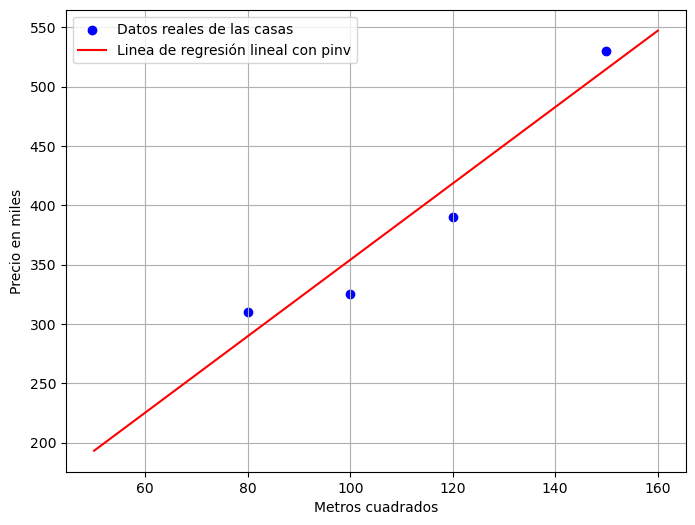

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(X_adulterada[:, 0], y, color='blue', label='Datos reales de las casas')
X_linea = np.array([[50], [160]])
X_linea_bias = np.c_[np.ones((2, 1)), X_linea, np.array([[2, 538], [4, 1722]])]
y_linea_prediccion = X_linea_bias @ theta
plt.plot(X_linea, y_linea_prediccion, color="red", label="Linea de regresión lineal con pinv")
plt.xlabel("Metros cuadrados")
plt.ylabel("Precio en miles")
plt.grid(True)
plt.legend()
plt.show()